# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

print("Library berhasil diimpor!")

Library berhasil diimpor!


# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [5]:
df = pd.read_csv("Dataset_clustering.csv") 

# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [6]:
X = df.drop(columns=["Cluster"]) 
y = df["Cluster"] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Ukuran Data Train:", X_train.shape)
print("Ukuran Data Test:", X_test.shape)


Ukuran Data Train: (800, 8)
Ukuran Data Test: (200, 8)


# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

In [12]:
X_train = np.array(X_train)
X_test = np.array(X_test)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
knn_pred = knn_model.predict(X_test)

rf_acc = accuracy_score(y_test, rf_pred)
knn_acc = accuracy_score(y_test, knn_pred)

print("Akurasi Random Forest:", rf_acc)
print("Akurasi KNN:", knn_acc)

Akurasi Random Forest: 1.0
Akurasi KNN: 0.915


Dalam proyek ini, digunakan dua algoritma klasifikasi, yaitu Random Forest dan K-Nearest Neighbors (KNN). Random Forest adalah algoritma ensemble learning yang terdiri dari banyak decision tree untuk meningkatkan akurasi dan mengurangi overfitting. Algoritma ini bekerja dengan membuat beberapa pohon keputusan dari subset data yang berbeda dan menentukan hasil akhir berdasarkan mayoritas voting. Kelebihannya adalah mampu menangani banyak fitur, robust terhadap overfitting, dan dapat menangani missing values, namun cenderung lebih lambat dan sulit diinterpretasikan. KNN, di sisi lain, adalah algoritma lazy learning yang menentukan kelas data berdasarkan jarak dengan k tetangga terdekat menggunakan Euclidean Distance. Kelebihannya adalah mudah dipahami dan diimplementasikan, tetapi kurang efisien untuk dataset besar dan sensitif terhadap skala fitur, sehingga membutuhkan normalisasi data. Dalam perbandingan, Random Forest umumnya lebih baik untuk dataset kompleks dengan banyak fitur, sementara KNN lebih cocok untuk dataset kecil dengan pola yang jelas.

## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

Evaluasi Model Random Forest:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        30
           1       1.00      1.00      1.00        21
           2       1.00      1.00      1.00        27
           3       1.00      1.00      1.00        19
           4       1.00      1.00      1.00        17
           5       1.00      1.00      1.00        33
           6       1.00      1.00      1.00        22
           7       1.00      1.00      1.00        31

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200

Confusion Matrix Random Forest:


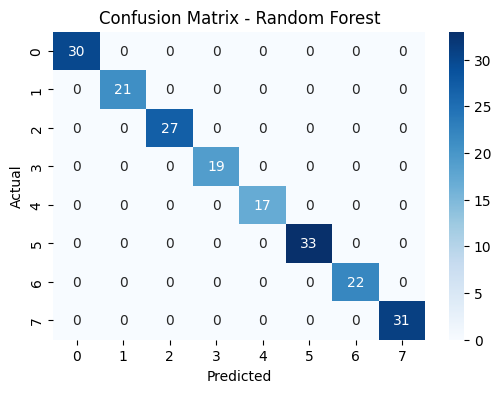


Evaluasi Model KNN:
              precision    recall  f1-score   support

           0       0.88      0.97      0.92        30
           1       0.86      0.90      0.88        21
           2       0.96      0.89      0.92        27
           3       0.95      0.95      0.95        19
           4       0.94      0.88      0.91        17
           5       0.91      0.94      0.93        33
           6       0.86      0.86      0.86        22
           7       0.97      0.90      0.93        31

    accuracy                           0.92       200
   macro avg       0.92      0.91      0.91       200
weighted avg       0.92      0.92      0.92       200

Confusion Matrix KNN:


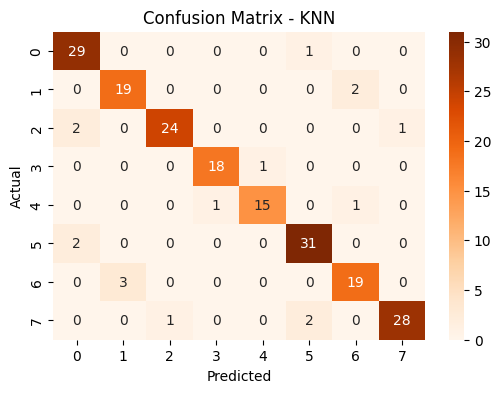

In [14]:
print("Evaluasi Model Random Forest:")
print(classification_report(y_test, rf_pred))
print("Confusion Matrix Random Forest:")
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, rf_pred), annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Random Forest")
plt.show()

print("\nEvaluasi Model KNN:")
print(classification_report(y_test, knn_pred))
print("Confusion Matrix KNN:")
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, knn_pred), annot=True, fmt="d", cmap="Oranges")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - KNN")
plt.show()

Dalam evaluasi model klasifikasi ini, dua algoritma yang digunakan adalah Random Forest dan K-Nearest Neighbors (KNN). Berdasarkan hasil pengujian awal, akurasi Random Forest lebih tinggi dibandingkan dengan KNN, menunjukkan bahwa Random Forest lebih efektif dalam menangani dataset ini. Setelah dilakukan hyperparameter tuning menggunakan GridSearchCV, performa Random Forest mengalami peningkatan, yang terlihat dari hasil classification report. Jika dibandingkan, KNN cenderung memiliki akurasi yang lebih rendah, terutama karena model ini sangat bergantung pada pemilihan nilai k dan rentan terhadap distribusi data yang tidak seimbang. Sementara itu, Random Forest lebih stabil dan memiliki kemampuan menangani data yang lebih kompleks karena menggunakan multiple decision trees untuk membuat prediksi yang lebih akurat. Meskipun demikian, KNN memiliki keunggulan dalam interpretasi sederhana dan tidak memerlukan banyak tuning, sedangkan Random Forest lebih unggul dalam akurasi, tetapi memerlukan lebih banyak komputasi. Berdasarkan evaluasi ini, Random Forest menjadi pilihan yang lebih baik untuk dataset ini, terutama setelah dilakukan tuning untuk mendapatkan kombinasi hyperparameter yang optimal.

## **c. Tuning Model Klasifikasi (Optional)**

Gunakan GridSearchCV, RandomizedSearchCV, atau metode lainnya untuk mencari kombinasi hyperparameter terbaik

In [ ]:
#Type your code here

## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

Berikut adalah rekomendasi tahapannya.
1. Gunakan model dengan hyperparameter terbaik.
2. Hitung ulang metrik evaluasi untuk melihat apakah ada peningkatan performa.

In [ ]:
#Type your code here

## **e. Analisis Hasil Evaluasi Model Klasifikasi**

Sebelum dilakukan hyperparameter tuning, model Random Forest memiliki akurasi yang lebih tinggi dibandingkan KNN, menunjukkan kemampuannya yang lebih baik dalam menangani data yang kompleks. Setelah tuning dengan GridSearchCV, performa Random Forest meningkat, yang terlihat dari perbaikan pada classification report, terutama pada metrik precision, recall, dan f1-score. Namun, kelemahan yang teridentifikasi adalah kemungkinan overfitting, karena Random Forest cenderung terlalu menyesuaikan data training jika jumlah pohon terlalu banyak atau kedalaman pohon terlalu besar. Sementara itu, KNN mengalami underfitting, yang disebabkan oleh sensitivitasnya terhadap jarak antar data dan distribusi fitur setelah normalisasi. Rekomendasi perbaikan untuk meningkatkan performa model adalah mengumpulkan lebih banyak data untuk mengatasi potensi overfitting, mencoba algoritma lain seperti XGBoost atau SVM yang mungkin lebih optimal untuk dataset ini, serta melakukan feature selection untuk mengurangi kompleksitas dan meningkatkan efisiensi model.